## Topic : Excercise 


- Read a file from github


In [ ]:
# read file from github

import requests
from io import StringIO

rest = requests.get("https://raw.githubusercontent.com/codebasics/math-for-machine-learning/refs/heads/main/3_normal_distribution/heights.csv")

print(rest)

# if the requests value is 200 [so, it's allow]

<Response [200]>


In [9]:
import pandas as pd
import seaborn as sns

In [5]:
# convert string text file to csv file
#  - format -> StringIO(rest.text)

df = pd.read_csv(StringIO(rest.text))

df.head()

,gender,height
0,Male,73.847017
1,Male,68.781904
2,Male,74.110105
3,Male,71.730978
4,Male,69.881796


In [8]:
print("Shape: ",df.shape)
df.describe()

Shape:  (10000, 2)


,height
count,10000.000000
mean,66.367560
std,3.847528
min,54.263133
25%,63.505620
50%,66.318070
75%,69.174262
max,78.998742


<Axes: xlabel='height', ylabel='Count'>

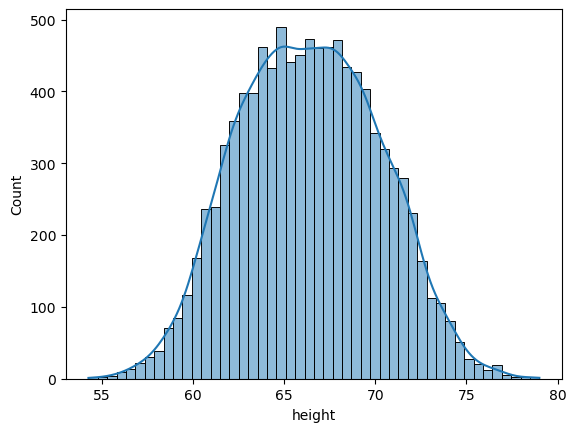

In [ ]:
# plot 

sns.histplot(df.height, kde = True)


### Outlier detecton using Standard deveriance (STD)

In [19]:
# outlier detecton using Standard deveriance (STD)
# Higest value: (mean + STD)
# lowest value: (mean - STD)
# if data outside this range(Higest value and lowest value) then that value count as a outliers


# find mean
mean = df['height'].mean()

# find std
std = df['height'].std()

upper_bound = mean + std

lower_bound = mean - std

print(f"Upper Height: {upper_bound:.2f} inch")
print(f"Lower Height: {lower_bound:.2f} inch")


Upper Height: 70.22 inch
Lower Height: 62.52 inch


In [33]:
# find the outlier

outliers = df[(df['height'] > upper_bound) |
   (df['height'] < lower_bound)
   ]

total_outliers = outliers['height'].count()
print("Total outliers using STD:", total_outliers)

Total outliers using STD: 3473


- so, 3473 outlier from the total height(10000)

### Interquartile Range (IQR)

- formula to detection outliers:
    - IQR = Q3 - Q1 

- Outlier Detection Rule:
    - min_value = Q1 - (1.5 * IQR)
    - max_value = Q3 + (1.5 + IQR)

- if value is outside this range then it's outliers

In [27]:
# find Q1 and Q3

# Q1 (25%)
Q1 = df['height'].quantile(0.25)

# Q3 (75%)

Q3 = df['height'].quantile(0.75)

print(f"Q1: {Q1:.2f} and Q3: {Q3:.2f}")

# Find IQR

IQR = Q3 - Q1

print(f"IQR: {IQR:.2f}")


Q1: 63.51 and Q3: 69.17
IQR: 5.67


- IQR: 5.67 means middle 50% of the data values are spread over a range of 5.67 units

In [ ]:
# outliers detection Range

min_val = Q1 - (1.5 * IQR)

max_val = Q3 + (1.5 + IQR)

print(f"Minimum Height: {min_val:.2f} inch")
print(f"Maximum Height: {max_val:.2f} inch")


Minimum Height: 55.00 inch
Maximum Height: 76.34 inch


In [34]:
# outliers detection

outlier_iqr = df[
    (df['height'] > max_val) |
    (df['height'] < min_val)
   ]

total_outliers_IQR = outlier_iqr['height'].count()

print("Total Outliers using IQR: ", total_outliers_IQR)

Total Outliers using IQR:  34


### Detection outliers using Z-Score

- Code Formula:
    - Z-score = (data - mean)/std

- outliers condition : abs(Z) > 3

In [36]:
# find the z-score

# mean value
mean_val = df['height'].mean()

# Std
std_val = df['height'].std()

print(f"Mean(Average) Height: {mean_val:.2f}")
print(f"STD Height: {std_val:.2f}")



Mean(Average) Height: 66.37
STD Height: 3.85


- Average Height => 66.37

- the difference (deviates) between mean and each data point(height) are 3.85

In [ ]:
# find the z-score
z_score = (df['height'] - mean_val)/std_val

print("First 10 Heights: \n", z_score.head(10))

print("Random 10 Heights: \n", z_score.sample(10))


First 10 Heights: 
 0    1.943964
1    0.627505
2    2.012343
3    1.393991
4    0.913375
5    0.230136
6    0.628331
7    0.514865
8    0.169301
9   -0.756607
Name: height, dtype: float64
Random 10 Heights: 
 4265    0.247421
4753    0.534003
3506    0.962598
8009   -0.786388
2882    0.705618
6039   -0.828245
4334   -0.122766
7179   -0.878897
5982   -0.695839
503     1.152525
Name: height, dtype: float64


In [44]:
print("Last 10 Heights: \n", z_score.tail(10))

Last 10 Heights: 
 9990   -0.828600
9991   -0.969684
9992   -1.114931
9993   -1.647064
9994   -1.889345
9995   -0.050658
9996    0.181830
9997   -0.649655
9998    0.693090
9999   -1.149651
Name: height, dtype: float64


In [45]:
import numpy as np

In [48]:
# Find the outliers using z-score

outlier_z_score = (np.abs(z_score) > 3)

print("Total outliers uisng z-score: ", outlier_z_score.sum())

Total outliers uisng z-score:  7


### Find outliers using modified z-score method

- Formula:
    - modifiedZ = 0.6745 x (xi - median)/MAD

- Formult MAD [Median Absolute Deviation]
    - MAD = median(abs(xi - median(X)))


- Outliers conditon: abs(Modified Z) > 3.5

In [ ]:
# find MAD (Median Absolute Deviation)

# Entire median(X)
median = df['height'].median()

# MAD
mad_val = np.median(abs(df['height'] - median))

print(f"Median of entire Height: {median:.2f} inch")

print(f"Median Absolute Deviation: {mad_val:.2f}")

Median of entire Height: 66.32 inch
Median Absolute Deviation: 2.84


In [54]:
# find the modifiedZ

mod_z =  0.6745 * (df['height'] - median)/mad_val

print("Modify z value: \n")
mod_z

Modify z value: 



0       1.788850
1       0.585398
2       1.851359
3       1.286087
4       0.846728
          ...   
9995   -0.034551
9996    0.177980
9997   -0.582130
9998    0.645353
9999   -1.039205
Name: height, Length: 10000, dtype: float64

In [60]:
# Detection the outliers

outlier_mod_z = (np.abs(mod_z) > 3.5)

print("Total Outliers Detection using ModifyZ_score: ", outlier_mod_z.sum())

Total Outliers Detection using ModifyZ_score:  0


### Summarize

- Total outliers using STD: 3473 

- Total Outliers using IQR:  34

- Total outliers uisng z-score:  7

- Total Outliers Detection using ModifyZ_score:  0

### Excercise Two:

#### Question:

In [73]:
res = requests.get("https://raw.githubusercontent.com/codebasics/math-for-machine-learning/refs/heads/main/3_normal_distribution/Exercise/exercise.md")

text = res.text
text.split("\n")

['## Exercise (Normal Distribution and Z Score for Outlier Removal)',
 '',
 'You are given bhp.csv which contains property prices in the city of banglore, India. You need to examine price_per_sqft column and do following,',
 '',
 '1. Remove outliers using percentile technique first. Use [0.001, 0.999] for lower and upper bound percentiles',
 '1. After removing outliers in step 1, you get a new dataframe.',
 '1. On step(2) dataframe, use 4 standard deviation to remove outliers',
 '1. Plot histogram for new dataframe that is generated after step (3). Also plot bell curve on same histogram',
 '1. On step(2) dataframe, use zscore of 4 to remove outliers. This is quite similar to step (3) and you will get exact same result',
 '',
 '[Solution](https://github.com/codebasics/math-for-machine-learning/blob/main/3_normal_distribution/Exercise/exercise_solution.ipynb)']